# MNIST Handwritten Digit Recognition using Convolutional Neural Network

In [7]:
# Imports required packages

from tensorflow.keras.datasets import mnist
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Loads training and testing data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
# Checks for data shape

print("Train data shape:", x_train.shape,
      "\nTest data shape:", x_test.shape)

Train data shape: (60000, 28, 28) 
Test data shape: (10000, 28, 28)


In [10]:
# Prepares training, validation and test data

x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32')/255
y_train = to_categorical(y_train)

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32')/255
y_test = to_categorical(y_test)

# Splits training data further into training and validation data sets
x_val = x_train[50000:]
x_train = x_train[:50000]

y_val = y_train[50000:]
y_train = y_train[:50000]

In [11]:
# Creates ConvNet model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Gets the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [12]:
# Compiles the model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Trains the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 32s 40ms/step - loss: 0.4458 - accuracy: 0.8577 - val_loss: 0.0879 - val_accuracy: 0.9727
Epoch 2/5
782/782 [==============================] - 30s 39ms/step - loss: 0.0580 - accuracy: 0.9806 - val_loss: 0.0451 - val_accuracy: 0.9878
Epoch 3/5
782/782 [==============================] - 34s 44ms/step - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 4/5
782/782 [==============================] - 33s 42ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0345 - val_accuracy: 0.9902
Epoch 5/5
782/782 [==============================] - 36s 46ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0339 - val_accuracy: 0.9905


In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

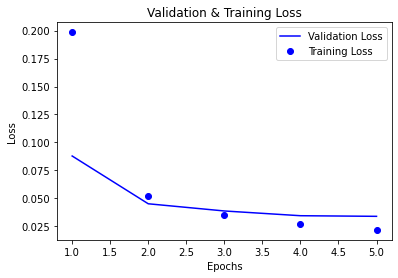

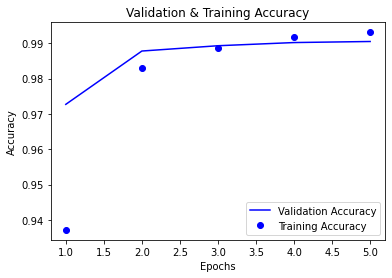

In [15]:
# Evaluates training and validation performance

history_dict = history.history

epochs = range(1, len(history_dict["accuracy"]) + 1)

val_loss = history_dict["val_loss"]
train_loss = history_dict["loss"]

val_accuracy = history_dict["val_accuracy"]
train_accuracy = history_dict["accuracy"]

plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.plot(epochs, train_loss, "bo", label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Validation & Training Loss")
plt.figure()

plt.plot(epochs, val_accuracy, "b", label = "Validation Accuracy")
plt.plot(epochs, train_accuracy, "bo", label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Validation & Training Accuracy")
plt.show()

In [17]:
# Combines back both training and validation and retrains final model

x_train = np.append(x_train, x_val, axis=0)
y_train = np.append(y_train, y_val, axis=0)

model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 31s 67ms/step - loss: 0.0169 - accuracy: 0.9947
Epoch 2/5
469/469 [==============================] - 32s 68ms/step - loss: 0.0126 - accuracy: 0.9962
Epoch 3/5
469/469 [==============================] - 32s 67ms/step - loss: 0.0101 - accuracy: 0.9970
Epoch 4/5
469/469 [==============================] - 33s 71ms/step - loss: 0.0088 - accuracy: 0.9974
Epoch 5/5
469/469 [==============================] - 38s 81ms/step - loss: 0.0070 - accuracy: 0.9980


In [18]:
# Evaluates the model against test data

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Testing Loss: ", test_loss, ", Testing Accuracy: ", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.0340 - accuracy: 0.9921
Testing Loss:  0.033955808728933334 , Testing Accuracy:  0.9921000003814697
